IMPORTS

In [3]:
import re
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,f1_score,fbeta_score,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,f1_score,fbeta_score,classification_report
from sklearn.linear_model import LogisticRegression
import time

DATASET ENCODING

In [4]:
  
df=pd.read_csv(r'E:\Project\1-Output\4 DATASETS WITH BEST 25 FEATURES\Best_25_Features_Dataset-4.csv')
X = df.loc[:,df.columns!="Label"]
y = df["Label"]

RANDOM FOREST

In [5]:
s =time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

params_grid = {
               'max_depth': [5,8,10,15,20,25,30,50],
               'max_features': ['log2','sqrt',0.25,0.5,0.6,1.0],
               'min_samples_leaf': [1,25,50,70],
               'min_samples_split': [2,5,10,20]
              }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
grid_search = GridSearchCV(RandomForestClassifier (random_state = 42), param_grid = params_grid, n_jobs = -1, cv = cv, scoring = 'accuracy')
grid_result = grid_search.fit(X_train, y_train)
print("Best parameters: %s" % (grid_result.best_params_))

gbc_clf2 = RandomForestClassifier(max_depth = grid_result.best_params_.get('max_depth'),
                     max_features = grid_result.best_params_.get('max_features'),
                     min_samples_leaf = grid_result.best_params_.get('min_samples_leaf'),
                     min_samples_split = grid_result.best_params_.get('min_samples_split'),
                     random_state=42)

gbc_clf2.fit(X_train, y_train)

e=time.time()
exe_time = round(e - s)
print("Execution Time in Seconds :", exe_time)

Best parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
Execution Time in Seconds : 139


Best parameters: {'max_depth': 8, 'max_features': 0.25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Execution Time in Seconds : 322


PERFORMANCE EVALUATION OF RANDOM FOREST

-------------------------------------Metrics------------------------------------------
Test accuracy score 100.0000
Test Recall 100.0000
Test Precision 100.0000
Test F1 Score 100.0000
Test F2 Score 100.0000
--------------------------TPR, TNR, FPR, FNR------------------------------------------
TPR 1.0000
TNR 1.0000
FPR 0.0000
FNR 0.0000
[[150   0]
 [  0 150]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



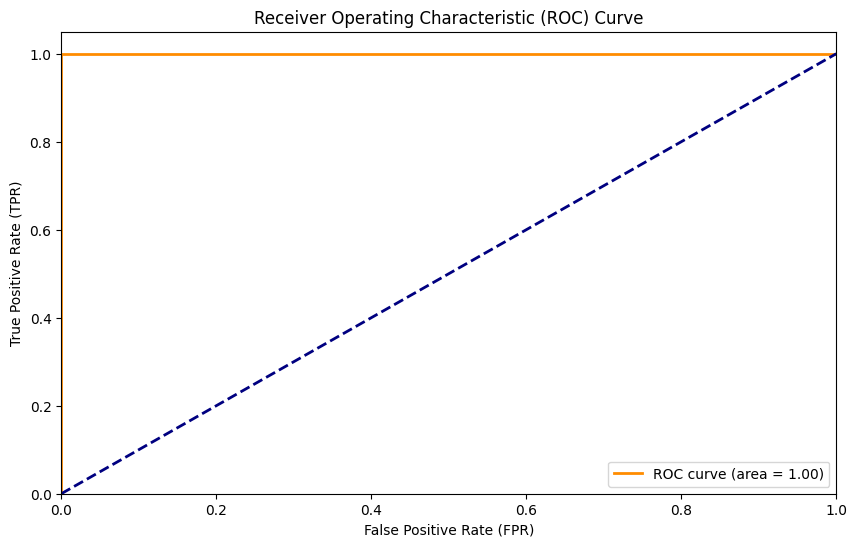

In [6]:
y_train_pred = gbc_clf2.predict(X_train)
y_test_pred = gbc_clf2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("-------------------------------------Metrics------------------------------------------")
print("Test accuracy score {:.4f}".format(accuracy_score(y_test, y_test_pred) * 100))
print("Test Recall {:.4f}".format(recall_score(y_test, y_test_pred) * 100))
print("Test Precision {:.4f}".format(precision_score(y_test, y_test_pred) * 100))
print("Test F1 Score {:.4f}".format(f1_score(y_test, y_test_pred) * 100))
print("Test F2 Score {:.4f}".format(fbeta_score(y_test, y_test_pred, beta=2.0) * 100))

print("--------------------------TPR, TNR, FPR, FNR------------------------------------------")
TPR = tp / (tp + fn)
TNR = tn / (tn + fp)
FPR = fp / (fp + tn)
FNR = fn / (fn + tp)
print("TPR {:.4f}".format(TPR))
print("TNR {:.4f}".format(TNR))
print("FPR {:.4f}".format(FPR))
print("FNR {:.4f}".format(FNR))
print(confusion_matrix(y_test,y_test_pred))
report = classification_report(y_test, y_test_pred)
print(report)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ADABOOST

In [7]:
s =time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

parameters = {
              'n_estimators': [10,50,100],
              'learning_rate': [0.01,0.05,0.1,0.5],
              'algorithm': ['SAMME','SAMME.R'],
              'estimator__max_depth': [1,50,100,200,300,400,500],
              'estimator__max_features': [2,10,100,200,300,400,500] 
             }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
RD_search = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42),parameters,cv=cv,n_jobs=-1,scoring='accuracy')
RD_result = RD_search.fit(X_train, y_train)
print("Best parameters: %s" % (RD_result.best_params_))

gbc_clf2 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=RD_result.best_params_['estimator__max_depth'], 
                              max_features=RD_result.best_params_['estimator__max_features']),
                              learning_rate=RD_result.best_params_['learning_rate'],
                              n_estimators=RD_result.best_params_['n_estimators'],
                              algorithm=RD_result.best_params_['algorithm'],
                              random_state=42)

gbc_clf2.fit(X_train, y_train)

e=time.time()
exe_time = round(e - s)
print("Execution Time in Seconds :", exe_time)

Best parameters: {'algorithm': 'SAMME.R', 'estimator__max_depth': 1, 'estimator__max_features': 2, 'learning_rate': 0.01, 'n_estimators': 50}
Execution Time in Seconds : 28


Best parameters: {'algorithm': 'SAMME.R', 'estimator__max_depth': 1, 'estimator__max_features': 100, 'learning_rate': 0.2, 'n_estimators': 460}
Execution Time in Seconds : 2249


PERFORMANCE EVALUATION OF ADABOOST

-------------------------------------Metrics------------------------------------------
Test accuracy score 99.3333
Test Recall 98.6667
Test Precision 100.0000
Test F1 Score 99.3289
Test F2 Score 98.9305
--------------------------TPR, TNR, FPR, FNR------------------------------------------
TPR 0.9867
TNR 1.0000
FPR 0.0000
FNR 0.0133
[[150   0]
 [  2 148]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       150
           1       1.00      0.99      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



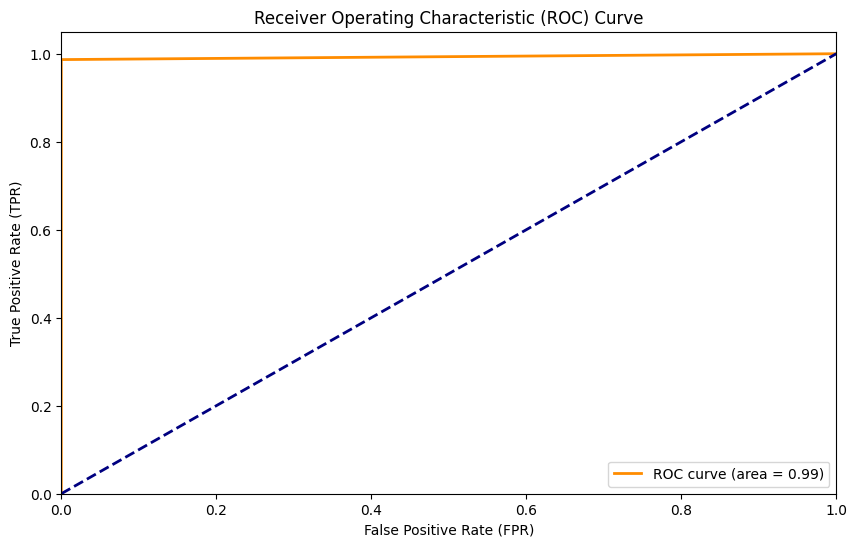

In [8]:
y_train_pred = gbc_clf2.predict(X_train)
y_test_pred = gbc_clf2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("-------------------------------------Metrics------------------------------------------")
print("Test accuracy score {:.4f}".format(accuracy_score(y_test, y_test_pred) * 100))
print("Test Recall {:.4f}".format(recall_score(y_test, y_test_pred) * 100))
print("Test Precision {:.4f}".format(precision_score(y_test, y_test_pred) * 100))
print("Test F1 Score {:.4f}".format(f1_score(y_test, y_test_pred) * 100))
print("Test F2 Score {:.4f}".format(fbeta_score(y_test, y_test_pred, beta=2.0) * 100))

print("--------------------------TPR, TNR, FPR, FNR------------------------------------------")
TPR = tp / (tp + fn)
TNR = tn / (tn + fp)
FPR = fp / (fp + tn)
FNR = fn / (fn + tp)
print("TPR {:.4f}".format(TPR))
print("TNR {:.4f}".format(TNR))
print("FPR {:.4f}".format(FPR))
print("FNR {:.4f}".format(FNR))
print(confusion_matrix(y_test,y_test_pred))
report = classification_report(y_test, y_test_pred)
print(report)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

GRADIENTBOOST

In [9]:
s =time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

parameters = {
              'loss': ['exponential'],
              'learning_rate': [0.01,0.05,0.1,0.5],
              'min_samples_split': [2,5,7,9],
              'min_samples_leaf': [3,5,6,8],
              'max_depth': [3,5,10,15],
              'max_features': [3,5,10,15],
              'criterion': ['friedman_mse'],
              'subsample': [0.5,0.8,0.9,1.0],
              'n_estimators': [10,50,100]
             }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
RD_search = GridSearchCV(GradientBoostingClassifier(random_state=42), parameters, cv=cv, n_jobs=-1, scoring='accuracy')
RD_result = RD_search.fit(X_train, y_train)
print("Best parameters: %s" % (RD_result.best_params_))

gbc_clf2 = GradientBoostingClassifier(learning_rate=RD_result.best_params_.get('learning_rate'),
                                      loss=RD_result.best_params_.get('loss'),
                                      min_samples_split=RD_result.best_params_.get('min_samples_split'),
                                      min_samples_leaf=RD_result.best_params_.get('min_samples_leaf'),
                                      max_depth=RD_result.best_params_.get('max_depth'),
                                      max_features=RD_result.best_params_.get('max_features'),
                                      criterion=RD_result.best_params_.get('criterion'),
                                      subsample=RD_result.best_params_.get('subsample'),
                                      n_estimators=RD_result.best_params_.get('n_estimators'),
                                      random_state=42)

gbc_clf2.fit(X_train, y_train)

e=time.time()
exe_time = round(e - s)
print("Execution Time in Seconds :", exe_time)

KeyboardInterrupt: 

Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'exponential', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.7}


PERFORMANCE EVALUATION OF GRADIENTBOOST

In [ ]:
y_train_pred = gbc_clf2.predict(X_train)
y_test_pred = gbc_clf2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("-------------------------------------Metrics------------------------------------------")
print("Test accuracy score {:.4f}".format(accuracy_score(y_test, y_test_pred) * 100))
print("Test Recall {:.4f}".format(recall_score(y_test, y_test_pred) * 100))
print("Test Precision {:.4f}".format(precision_score(y_test, y_test_pred) * 100))
print("Test F1 Score {:.4f}".format(f1_score(y_test, y_test_pred) * 100))
print("Test F2 Score {:.4f}".format(fbeta_score(y_test, y_test_pred, beta=2.0) * 100))

print("--------------------------TPR, TNR, FPR, FNR------------------------------------------")
TPR = tp / (tp + fn)
TNR = tn / (tn + fp)
FPR = fp / (fp + tn)
FNR = fn / (fn + tp)
print("TPR {:.4f}".format(TPR))
print("TNR {:.4f}".format(TNR))
print("FPR {:.4f}".format(FPR))
print("FNR {:.4f}".format(FNR))
print(confusion_matrix(y_test,y_test_pred))
report = classification_report(y_test, y_test_pred)
print(report)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

XGBOOST

In [ ]:
s =time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

parameters = {
              'objective': ['binary:logistic'],
              'learning_rate': [0.05,0.1,0.5,1.0], 
              'max_depth': [2,4,6,8],
              'min_child_weight': [3,5,7,9],
              'subsample':  [0.1,0.3,0.5,0.7],
              'colsample_bytree': [0.3,0.5,0.8],
              'n_estimators': [10,50,100],
              'gamma': [0.1,0.3,0.4,0.7]
              }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
RD = GridSearchCV(xgb.XGBClassifier(random_state=42), parameters, n_jobs=1, cv=cv, scoring='accuracy',verbose=0, refit=True)
RD_result = RD.fit(X_train, y_train)
print("Best parameters: %s" % (RD.best_params_))

gbc_clf2 = xgb.XGBClassifier(objective = RD.best_params_.get('objective'),
                     learning_rate = RD.best_params_.get('learning_rate'),
                     max_depth = RD.best_params_.get('max_depth'),
                     min_child_weight = RD.best_params_.get('min_child_weight'),
                     subsample = RD.best_params_.get('subsample'),
                     colsample_bytree = RD.best_params_.get('colsample_bytree'),
                     n_estimators = RD.best_params_.get('n_estimators'),
                     gamma = RD.best_params_.get('gamma'),
                     random_state=42)

gbc_clf2.fit(X_train, y_train)

e=time.time()
exe_time = round(e - s)
print("Execution Time in Seconds :", exe_time)

Best parameters: {'colsample_bytree': 0.2, 'gamma': 0.8, 'learning_rate': 0.6, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 0.7}


PERFORMANCE EVALUATION OF XGBOOST

In [ ]:
y_train_pred = gbc_clf2.predict(X_train)
y_test_pred = gbc_clf2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("-------------------------------------Metrics------------------------------------------")
print("Test accuracy score {:.4f}".format(accuracy_score(y_test, y_test_pred) * 100))
print("Test Recall {:.4f}".format(recall_score(y_test, y_test_pred) * 100))
print("Test Precision {:.4f}".format(precision_score(y_test, y_test_pred) * 100))
print("Test F1 Score {:.4f}".format(f1_score(y_test, y_test_pred) * 100))
print("Test F2 Score {:.4f}".format(fbeta_score(y_test, y_test_pred, beta=2.0) * 100))

print("--------------------------TPR, TNR, FPR, FNR------------------------------------------")
TPR = tp / (tp + fn)
TNR = tn / (tn + fp)
FPR = fp / (fp + tn)
FNR = fn / (fn + tp)
print("TPR {:.4f}".format(TPR))
print("TNR {:.4f}".format(TNR))
print("FPR {:.4f}".format(FPR))
print("FNR {:.4f}".format(FNR))
print(confusion_matrix(y_test,y_test_pred))
report = classification_report(y_test, y_test_pred)
print(report)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()